In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/vancouver_real_estate.csv', index_col = 0)
df.reset_index(inplace=True)
df.drop(['level_0', 'index'], axis=1, inplace=True)
df


,address,zip_code,price,bed,bath,sqr_footage,property_link
0,4091 W 34th Ave,V6N 2L6,"$2,788,000",5 beds,2 baths,"1,653",https://www.redfin.com/bc/vancouver/4091-W-34t...
1,4067 W 37th Ave,V6N 2W6,"$4,800,000",6 beds,4 baths,"4,189",https://www.redfin.com/bc/vancouver/4067-W-37t...
2,4056 W 36th Ave,V6N 2S9,"$6,750,000",4 beds,3 baths,"3,837",https://www.redfin.com/bc/vancouver/4056-W-36t...
3,3968 W 23rd Ave,V6S 1L2,"$3,388,000",4 beds,3.5 baths,"2,359",https://www.redfin.com/bc/vancouver/3968-W-23r...
4,4022 W 30th Ave,V6S 1X5,"$6,590,000",5 beds,5.5 baths,"4,190",https://www.redfin.com/bc/vancouver/4022-W-30t...
...,...,...,...,...,...,...,...
11120,1931 East 7TH Ave #1927,V5N 1S3,"$3,598,000",7 beds,5 baths,"3,063",https://www.redfin.com/BC/Vancouver/1931-E-7th...
11121,3311 Sophia St,V5V 3T4,"$2,775,000",6 beds,5.5 baths,"3,073",https://www.redfin.com/bc/vancouver/3311-Sophi...
11122,3778 Wakefield C,V5G 2C4,"$2,190,000",4 beds,2.5 baths,"2,365",https://www.redfin.com/bc/burnaby/3778-Wakefie...
11123,2829 Ash St #101,V5Z 4P5,"$919,000",2 beds,2 baths,924,https://www.redfin.com/bc/vancouver/2829-Ash-S...


In [3]:

# Convert empty strings and None to NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Convert price to float
df["price"] = df["price"].replace(r"[\$,]", "", regex=True).astype(float)

# Convert bed to integer (using Int64 which supports NaN)
df["bed"] = df["bed"].astype(str).str.extract(r"(\d+)").astype("Int64")

# Convert bath to float (supports half baths)
df["bath"] = df["bath"].astype(str).str.extract(r"(\d+\.?\d*)").astype(float)

# Convert sqr_footage to float, handling missing values properly
df["sqr_footage"] = (
    df["sqr_footage"]
    .astype(str)
    .str.replace(",", "", regex=True)  
)



In [4]:
df

,address,zip_code,price,bed,bath,sqr_footage,property_link
0,4091 W 34th Ave,V6N 2L6,2788000.0,5,2.0,1653,https://www.redfin.com/bc/vancouver/4091-W-34t...
1,4067 W 37th Ave,V6N 2W6,4800000.0,6,4.0,4189,https://www.redfin.com/bc/vancouver/4067-W-37t...
2,4056 W 36th Ave,V6N 2S9,6750000.0,4,3.0,3837,https://www.redfin.com/bc/vancouver/4056-W-36t...
3,3968 W 23rd Ave,V6S 1L2,3388000.0,4,3.5,2359,https://www.redfin.com/bc/vancouver/3968-W-23r...
4,4022 W 30th Ave,V6S 1X5,6590000.0,5,5.5,4190,https://www.redfin.com/bc/vancouver/4022-W-30t...
...,...,...,...,...,...,...,...
11120,1931 East 7TH Ave #1927,V5N 1S3,3598000.0,7,5.0,3063,https://www.redfin.com/BC/Vancouver/1931-E-7th...
11121,3311 Sophia St,V5V 3T4,2775000.0,6,5.5,3073,https://www.redfin.com/bc/vancouver/3311-Sophi...
11122,3778 Wakefield C,V5G 2C4,2190000.0,4,2.5,2365,https://www.redfin.com/bc/burnaby/3778-Wakefie...
11123,2829 Ash St #101,V5Z 4P5,919000.0,2,2.0,924,https://www.redfin.com/bc/vancouver/2829-Ash-S...


(array([3.451e+03, 3.515e+03, 2.587e+03, 8.130e+02, 2.740e+02, 1.560e+02,
        1.140e+02, 7.500e+01, 2.600e+01, 3.300e+01, 1.100e+01, 9.000e+00,
        9.000e+00, 5.000e+00, 9.000e+00, 1.400e+01, 3.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 7.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([   54000.,  1048920.,  2043840.,  3038760.,  4033680.,  5028600.,
         6023520.,  7018440.,  8013360.,  9008280., 10003200., 10998120.,
        11993040., 12987960., 13982880., 14977800., 15972720., 16967640.,
        17962560., 18957480., 19952400., 20947320., 21942240., 22937160.,
        23932080., 24927000., 25921920., 26916840., 27911760., 28906680.,
      

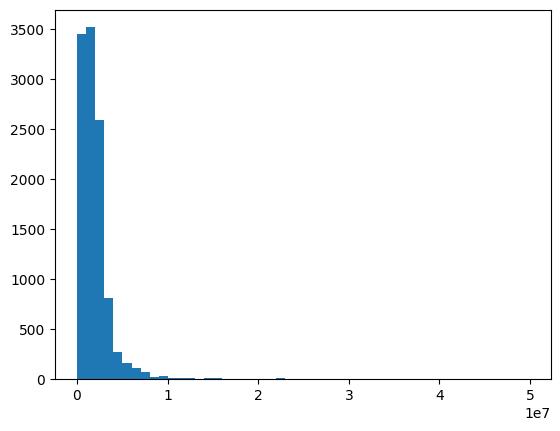

In [8]:
# EDA
plt.hist(df["price"].dropna(), bins=50)

(array([ 218.,  209., 1052., 3014.,  169.,  253.,   84.,   76.,  293.,
         155.,  175.,  217.,  156.,   91.,  155.,   91.,   87.,   63.,
         266.,   70.,  144.,  304.,  130.,  154.,  146.,  146.,  167.,
         119.,  165.,  222.,  221.,  146.,  122.,   91.,  205.,  108.,
         285.,  130.,  152.,  128.,   95.,  121.,  100.,  188.,   79.,
          83.,   60.,   62.,   76.,   82.]),
 array([   0.  ,   40.84,   81.68,  122.52,  163.36,  204.2 ,  245.04,
         285.88,  326.72,  367.56,  408.4 ,  449.24,  490.08,  530.92,
         571.76,  612.6 ,  653.44,  694.28,  735.12,  775.96,  816.8 ,
         857.64,  898.48,  939.32,  980.16, 1021.  , 1061.84, 1102.68,
        1143.52, 1184.36, 1225.2 , 1266.04, 1306.88, 1347.72, 1388.56,
        1429.4 , 1470.24, 1511.08, 1551.92, 1592.76, 1633.6 , 1674.44,
        1715.28, 1756.12, 1796.96, 1837.8 , 1878.64, 1919.48, 1960.32,
        2001.16, 2042.  ]),
 <BarContainer object of 50 artists>)

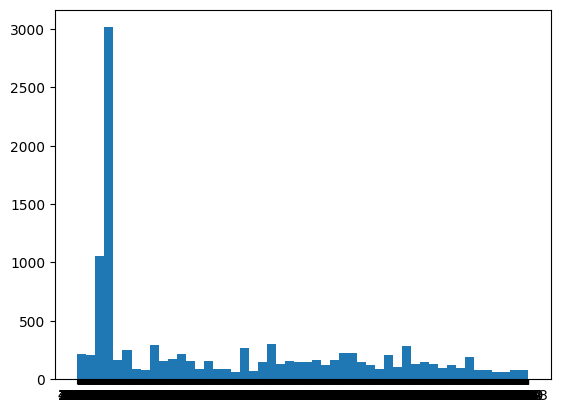

In [10]:
plt.hist(df["sqr_footage"].dropna(), bins=50)